## Bank Marketing
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 20 2024

In [507]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

In [509]:
data = pd.read_csv('C:/Users/abu_s/Desktop/Data/bank-additional.csv', delimiter=';')
df = data.copy()
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [512]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Select categorical variables of object type

In [515]:
#Select categorical variables of object type.
categorical_columns = df.select_dtypes(include=['object']).columns

#Chi-square test for each categorical variable.
for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['y'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Test for {column}:   p-value = {p}")

Chi-Square Test for job:   p-value = 1.2331316121045092e-10
Chi-Square Test for marital:   p-value = 0.016285726690484368
Chi-Square Test for education:   p-value = 0.002262143344636543
Chi-Square Test for default:   p-value = 5.599507868459048e-06
Chi-Square Test for housing:   p-value = 0.730743991844591
Chi-Square Test for loan:   p-value = 0.5684489495019593
Chi-Square Test for contact:   p-value = 1.8479997217891733e-18
Chi-Square Test for month:   p-value = 2.8948750374216133e-59
Chi-Square Test for day_of_week:   p-value = 0.9723048648716545
Chi-Square Test for poutcome:   p-value = 2.039413060817866e-99
Chi-Square Test for y:   p-value = 0.0


In [518]:
df = df.drop('default', axis=1)

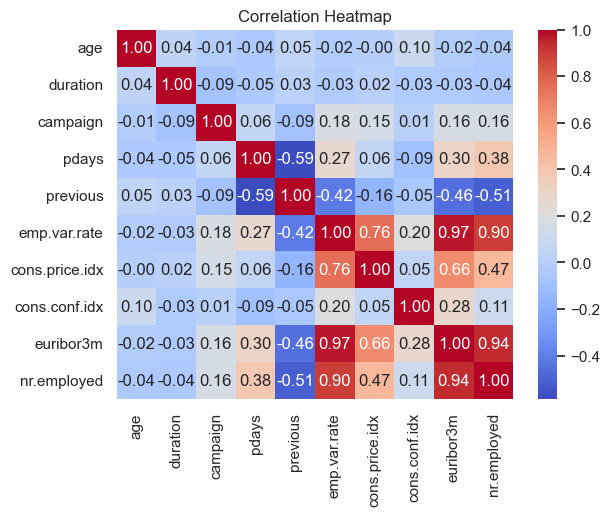

In [520]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

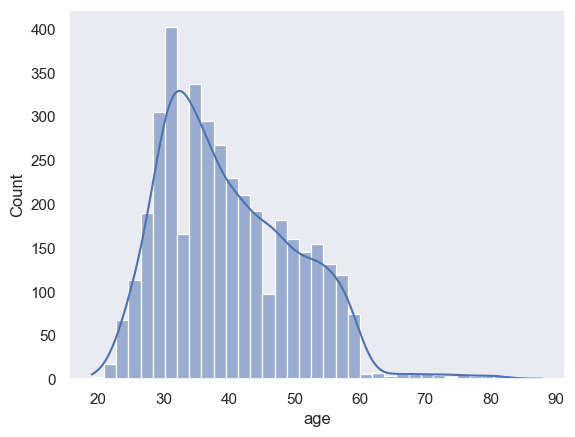

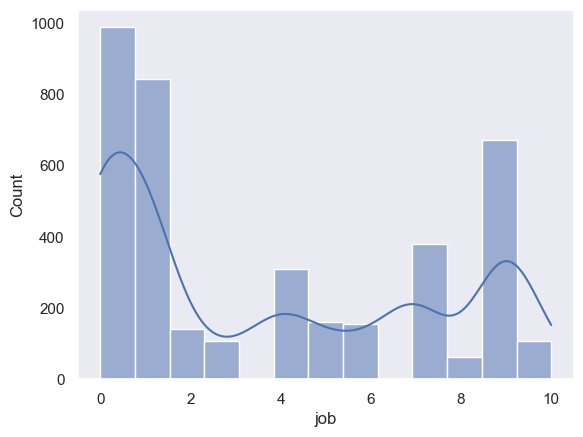

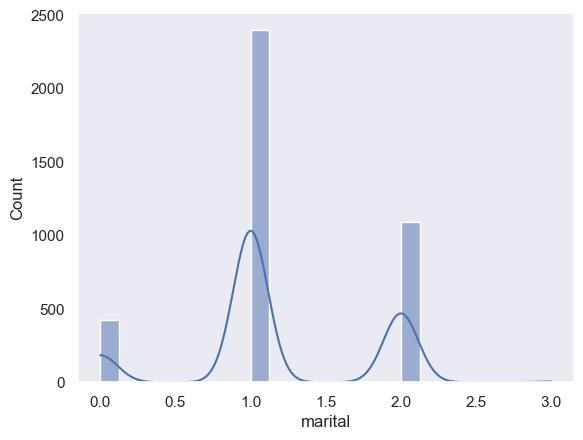

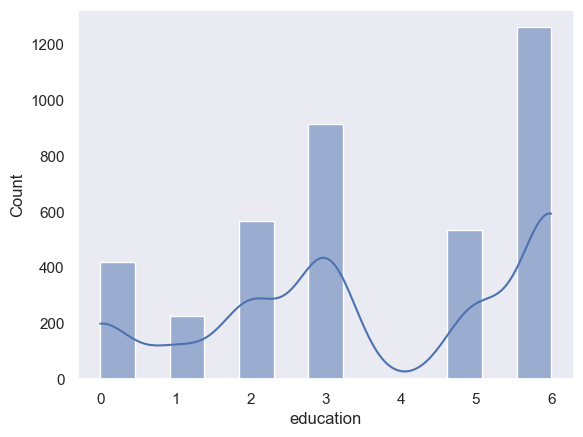

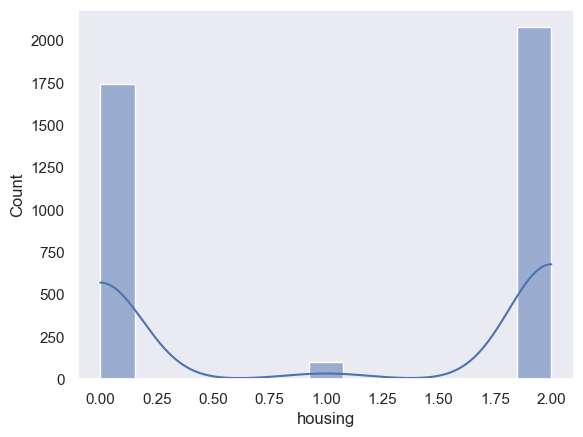

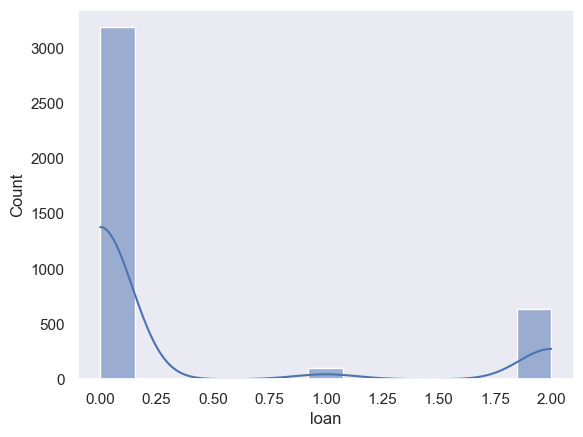

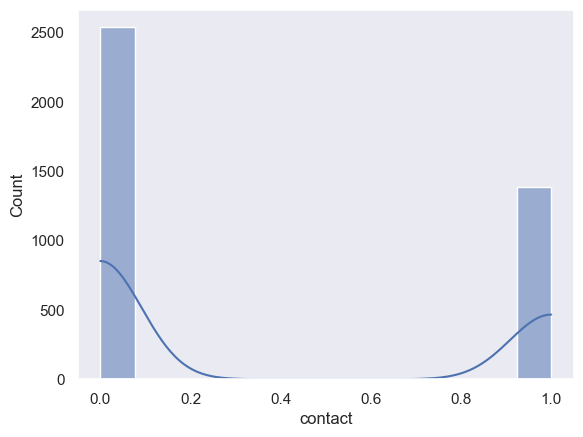

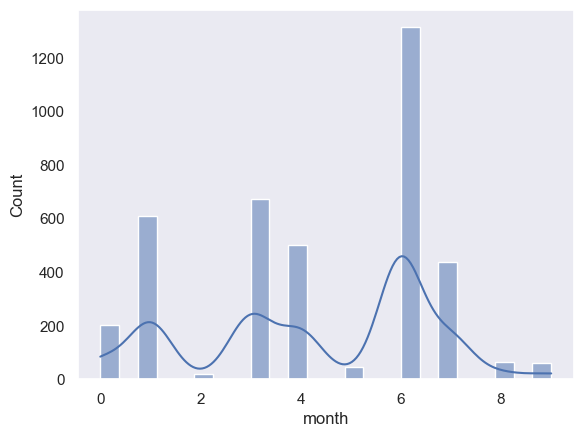

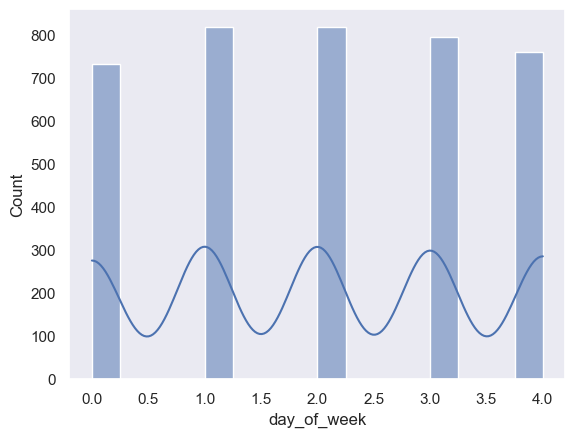

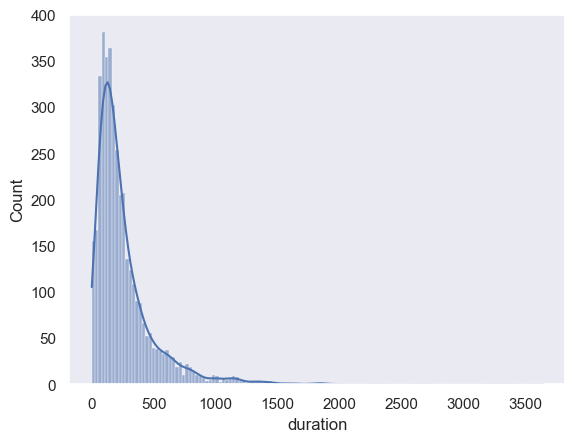

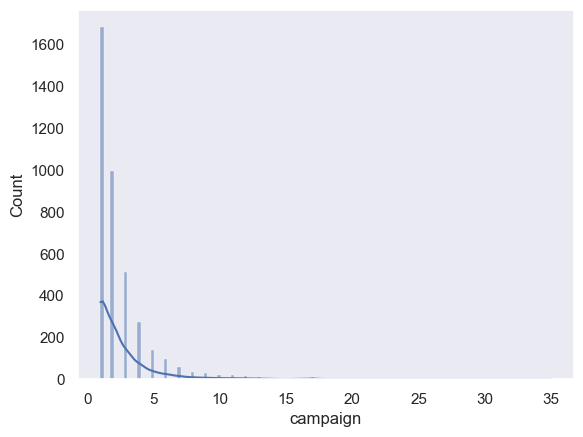

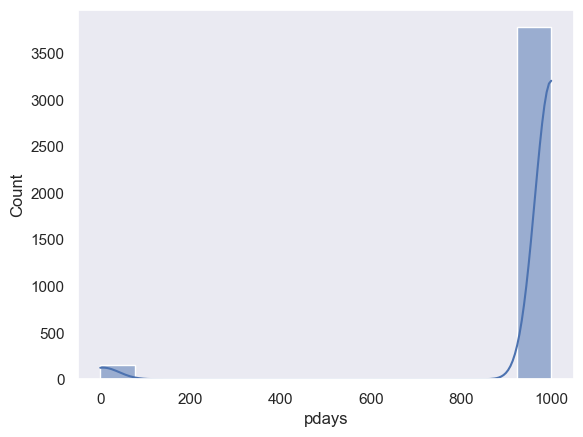

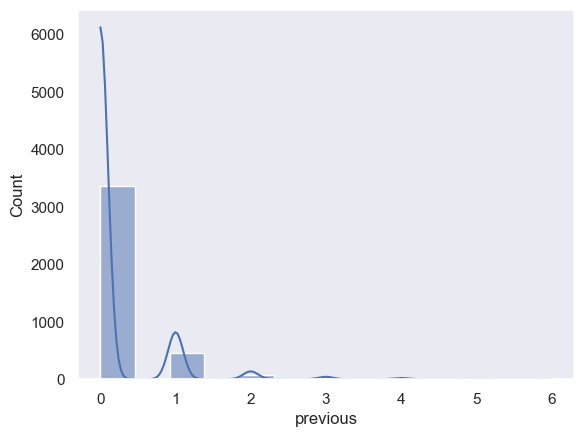

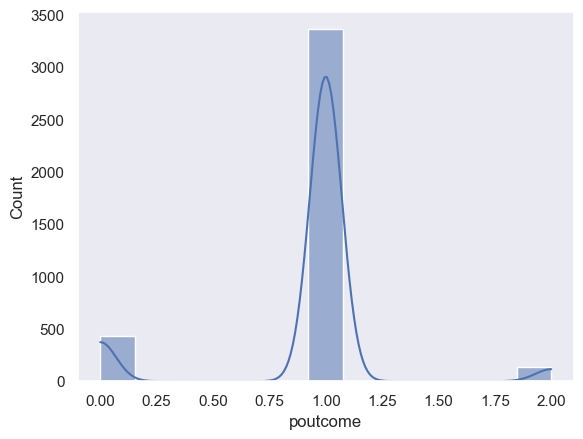

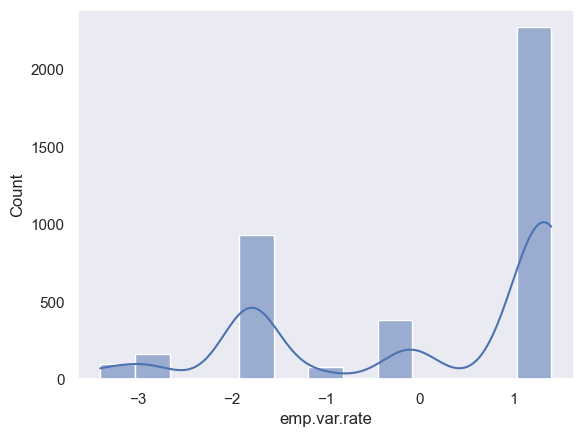

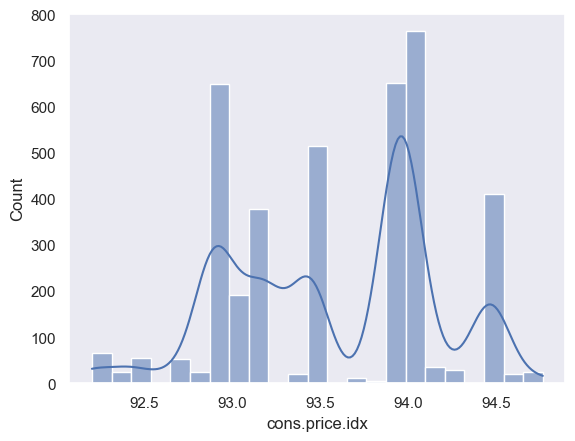

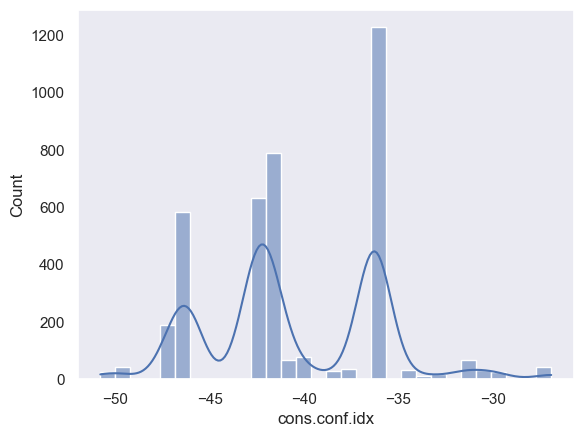

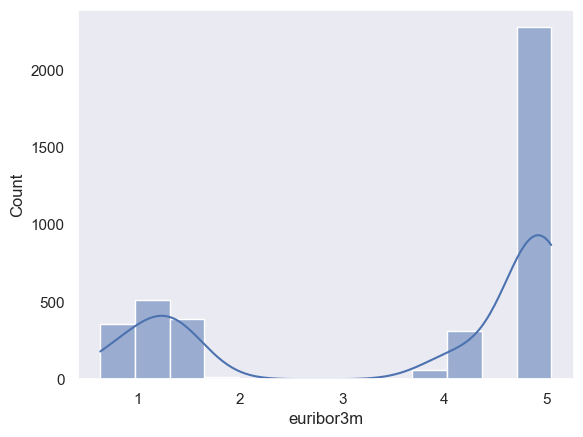

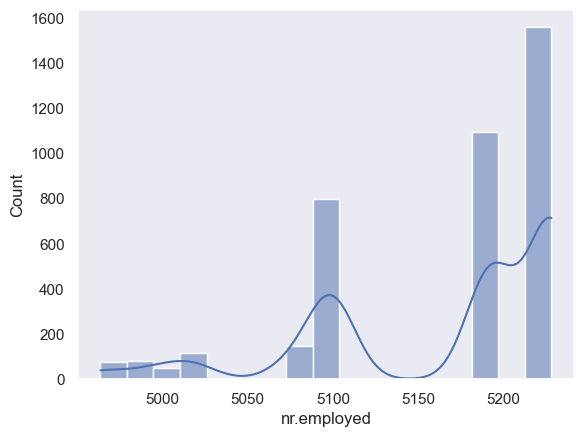

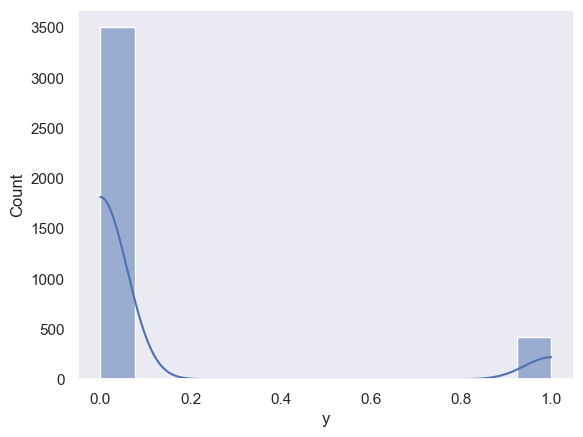

In [503]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

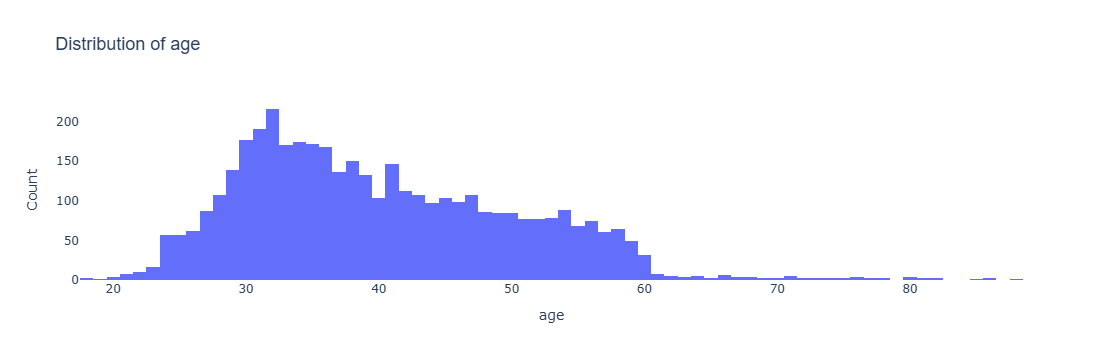

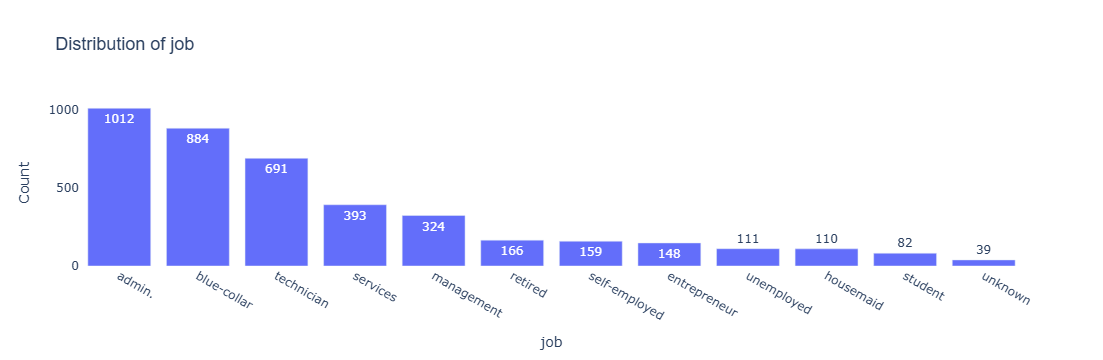

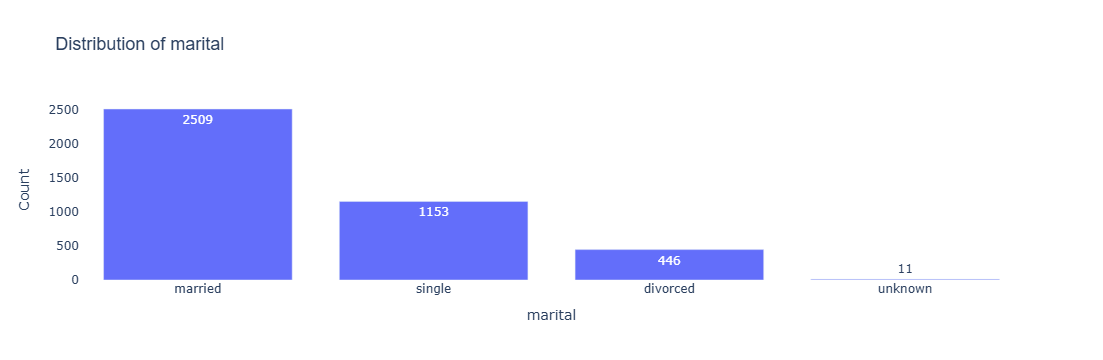

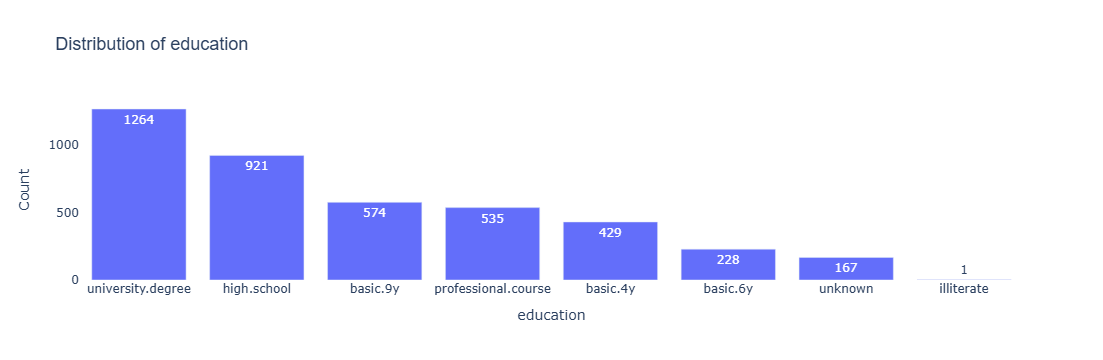

Column default does not exist in the DataFrame
Column balance does not exist in the DataFrame


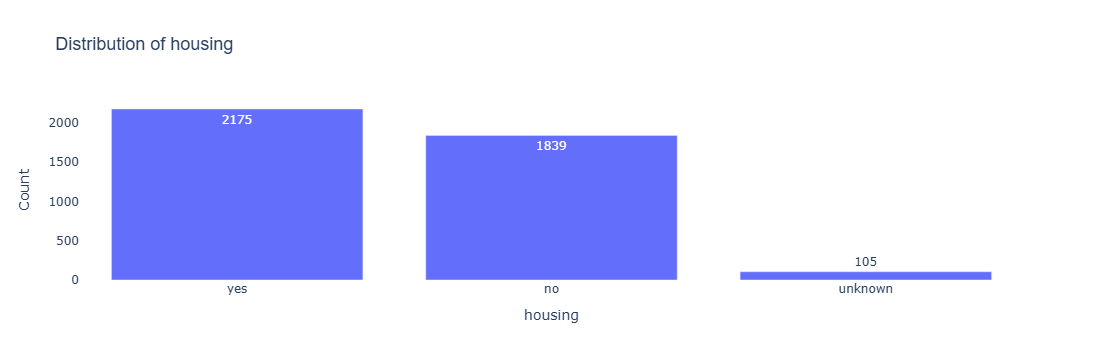

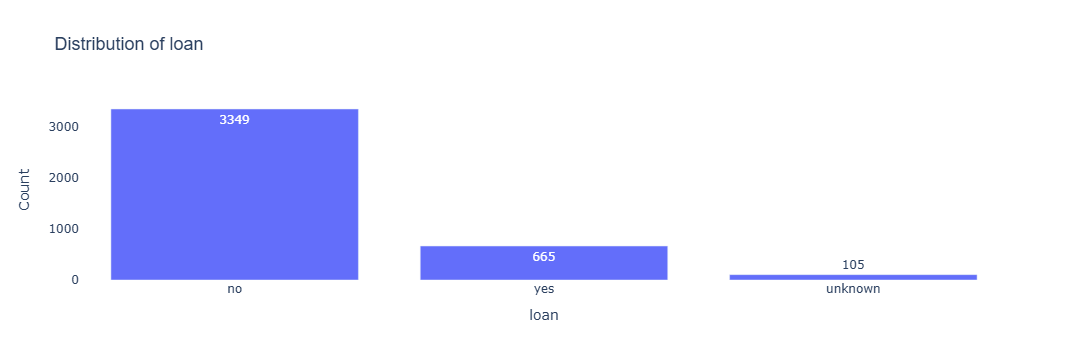

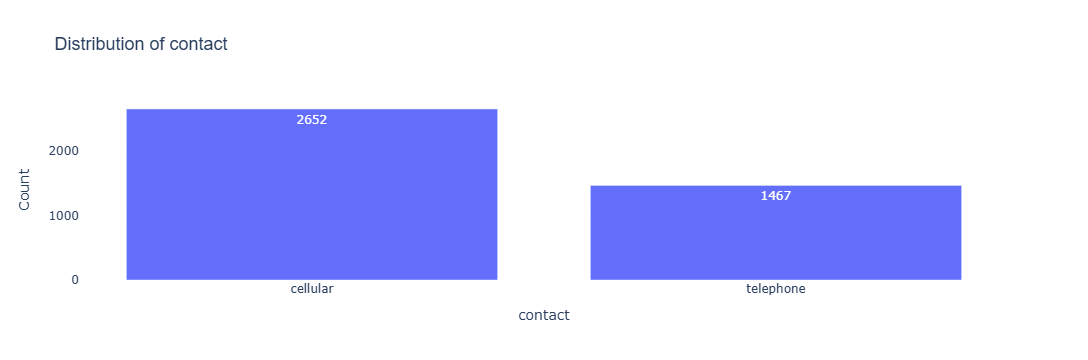

Column day does not exist in the DataFrame


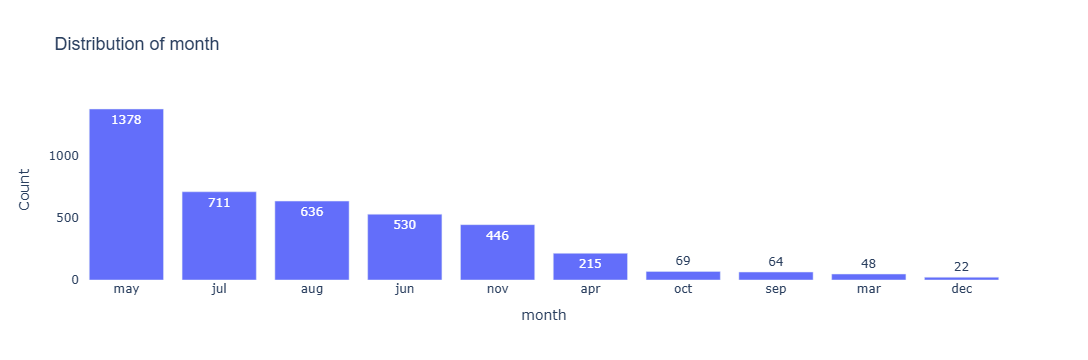

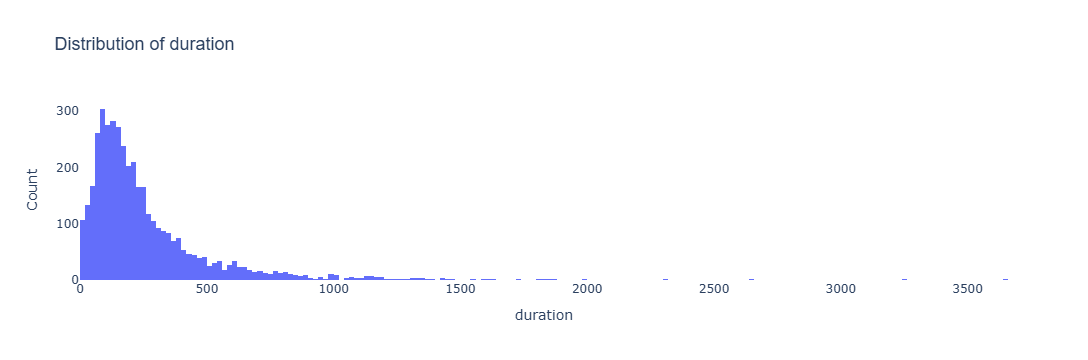

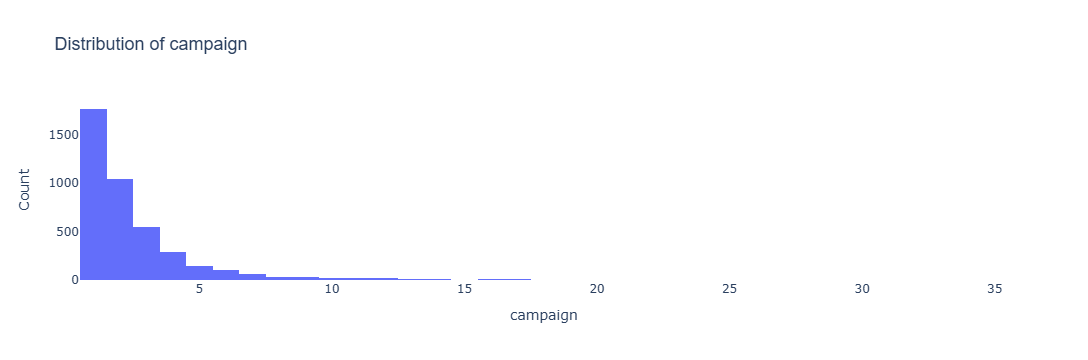

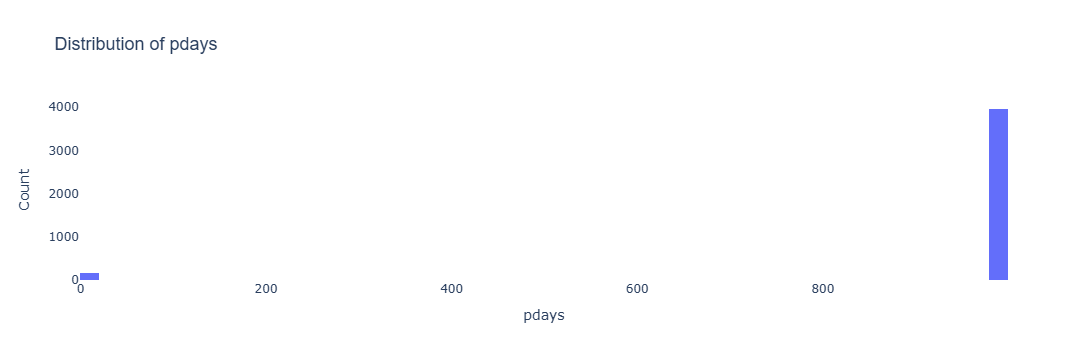

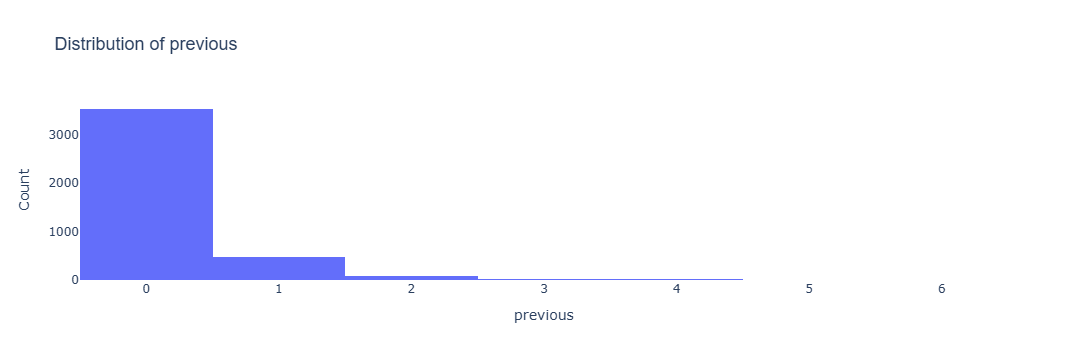

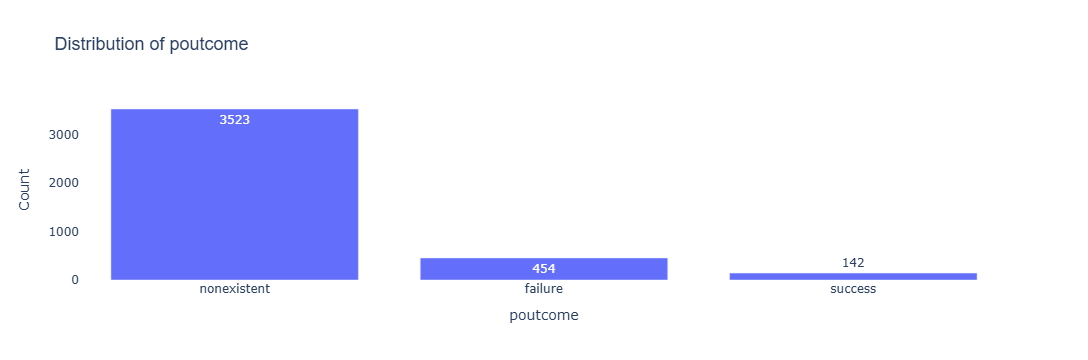

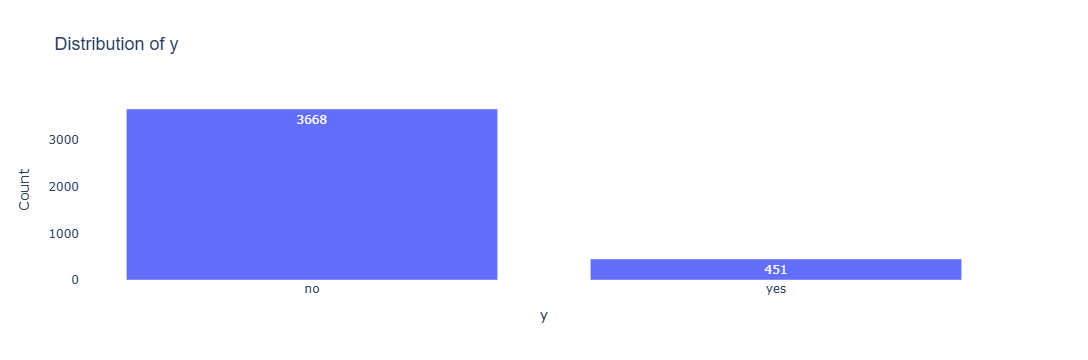

In [522]:
# Define the columns you want to plot
columns =['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

### Object Counts

In [404]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col} - Unique values: {df[col].nunique()}")

Column: job - Unique values: 12
Column: marital - Unique values: 4
Column: education - Unique values: 8
Column: housing - Unique values: 3
Column: loan - Unique values: 3
Column: contact - Unique values: 2
Column: month - Unique values: 10
Column: day_of_week - Unique values: 5
Column: poutcome - Unique values: 3
Column: y - Unique values: 2


In [405]:
#Select categorical variables of object type.
categorical_columns = df.select_dtypes(include=['object']).columns

#Print the unique values of each categorical variable.
for column in categorical_columns:
    print(f"Unique values for--> {column}: {df[column].unique()}")

Unique values for--> job: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
Unique values for--> marital: ['married' 'single' 'divorced' 'unknown']
Unique values for--> education: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
Unique values for--> housing: ['yes' 'no' 'unknown']
Unique values for--> loan: ['no' 'unknown' 'yes']
Unique values for--> contact: ['cellular' 'telephone']
Unique values for--> month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
Unique values for--> day_of_week: ['fri' 'wed' 'mon' 'thu' 'tue']
Unique values for--> poutcome: ['nonexistent' 'failure' 'success']
Unique values for--> y: ['no' 'yes']


In [406]:
df['job'].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

In [407]:
df = df[df['job'] != 'unknown']

In [408]:
df['education'].value_counts()

education
university.degree      1261
high.school             915
basic.9y                568
professional.course     533
basic.4y                421
basic.6y                227
unknown                 154
illiterate                1
Name: count, dtype: int64

In [409]:
df = df[df['education'] != 'unknown']

In [410]:
df['contact'].value_counts()

contact
cellular     2538
telephone    1388
Name: count, dtype: int64

In [411]:
df['poutcome'].value_counts()

poutcome
nonexistent    3363
failure         431
success         132
Name: count, dtype: int64

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3926 non-null   int64  
 1   job             3926 non-null   object 
 2   marital         3926 non-null   object 
 3   education       3926 non-null   object 
 4   housing         3926 non-null   object 
 5   loan            3926 non-null   object 
 6   contact         3926 non-null   object 
 7   month           3926 non-null   object 
 8   day_of_week     3926 non-null   object 
 9   duration        3926 non-null   int64  
 10  campaign        3926 non-null   int64  
 11  pdays           3926 non-null   int64  
 12  previous        3926 non-null   int64  
 13  poutcome        3926 non-null   object 
 14  emp.var.rate    3926 non-null   float64
 15  cons.price.idx  3926 non-null   float64
 16  cons.conf.idx   3926 non-null   float64
 17  euribor3m       3926 non-null   float6

In [413]:
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


In [414]:
# List of numerical variables.
numerical_columns = df.select_dtypes(include=['int64']).columns

# point-biserial correlation
for column in numerical_columns:
    correlation, p_value = pointbiserialr(df[column], df['y'].apply(lambda x: 1 if x == 'yes' else 0))
    print(f"Correlation between {column} and y: {correlation}, p-value: {p_value}")

Correlation between age and y: 0.04820397676671659, p-value: 0.0025181690018676738
Correlation between duration and y: 0.42275354712726654, p-value: 5.125043446202322e-170
Correlation between campaign and y: -0.07430260346413298, p-value: 3.1529142368049023e-06
Correlation between pdays and y: -0.3324456531865503, p-value: 6.131031364233525e-102
Correlation between previous and y: 0.2578851017379219, p-value: 1.127377364050009e-60


In [415]:
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


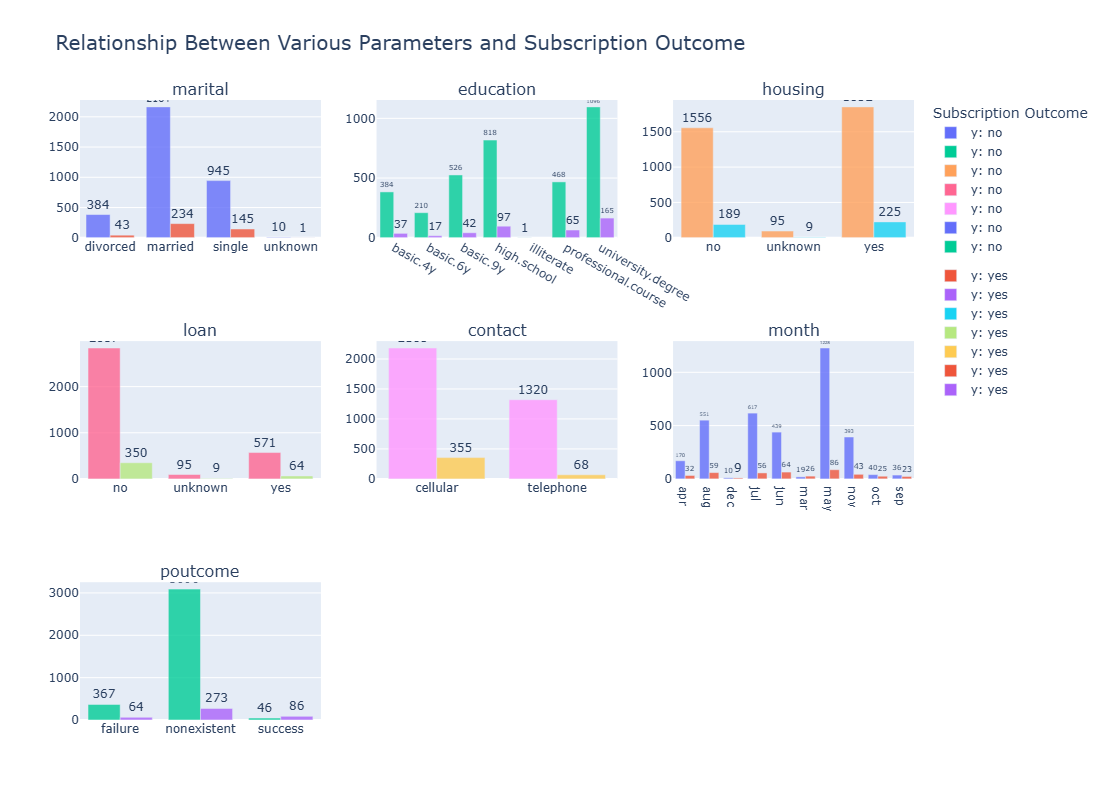

In [416]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data
categorical_columns = ['marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']
target_column = 'y'

# Create a subplot grid
fig = make_subplots(rows=3, cols=3, subplot_titles=categorical_columns)

# Add bar charts to subplots
row, col = 1, 1
for column in categorical_columns:
    # Create a grouped bar chart for the current column
    grouped_data = df.groupby([column, target_column]).size().reset_index(name='Count')
    for target in grouped_data[target_column].unique():
        subset = grouped_data[grouped_data[target_column] == target]
        fig.add_trace(
            go.Bar(
                x=subset[column],
                y=subset['Count'],
                name=f"{target_column}: {target}",
                legendgroup=str(target),
                text=subset['Count'],
                textposition='outside'
            ),
            row=row, col=col
        )
    # Move to the next subplot
    col += 1
    if col > 3:
        col = 1
        row += 1

# Update layout
fig.update_layout(
    title="Relationship Between Various Parameters and Subscription Outcome",
    title_font_size=20,
    showlegend=True,
    legend_title="Subscription Outcome",
    barmode="group",
    height=800,
    width=1000
)

# Update axis labels and font sizes
fig.update_xaxes(title_font=dict(size=12))
fig.update_yaxes(title_font=dict(size=12))
fig.update_traces(marker=dict(opacity=0.8))

# Show the plot
fig.show()


### Encode Data

In [418]:
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


In [419]:
# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Get the categorical columns of object type
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder for each categorical column and perform the transformation back to original values
for column in categorical_columns:
    # Save the original values of the categorical column
    original_values = df[column].unique()
    
    # Create the LabelEncoder object and apply fit_transform
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    # Encoded values
    encoded_values = df[column].unique()
    
    # Inverse (decode) operation
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    
    # Print the results
    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


job Encoding and Decoding:
1 -> blue-collar
7 -> services
0 -> admin.
2 -> entrepreneur
6 -> self-employed
9 -> technician
4 -> management
5 -> retired
3 -> housemaid
10 -> unemployed
8 -> student

marital Encoding and Decoding:
1 -> married
2 -> single
0 -> divorced
3 -> unknown

education Encoding and Decoding:
2 -> basic.9y
3 -> high.school
6 -> university.degree
5 -> professional.course
1 -> basic.6y
0 -> basic.4y
4 -> illiterate

housing Encoding and Decoding:
2 -> yes
0 -> no
1 -> unknown

loan Encoding and Decoding:
0 -> no
1 -> unknown
2 -> yes

contact Encoding and Decoding:
0 -> cellular
1 -> telephone

month Encoding and Decoding:
6 -> may
4 -> jun
7 -> nov
9 -> sep
3 -> jul
1 -> aug
5 -> mar
8 -> oct
0 -> apr
2 -> dec

day_of_week Encoding and Decoding:
0 -> fri
4 -> wed
1 -> mon
2 -> thu
3 -> tue

poutcome Encoding and Decoding:
1 -> nonexistent
0 -> failure
2 -> success

y Encoding and Decoding:
0 -> no
1 -> yes


In [420]:
X = df.drop('y', axis=1)
y = df['y']

In [421]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,2,0,0,6,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,1,6,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,2,0,1,4,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,1,1,1,4,0,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,2,0,0,7,1,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [422]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 ,random_state=42)

In [423]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [424]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
random_forest_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print('Accuracy Score:', random_forest_accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.9134860050890585

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       702
           1       0.67      0.38      0.48        84

    accuracy                           0.91       786
   macro avg       0.80      0.68      0.72       786
weighted avg       0.90      0.91      0.90       786



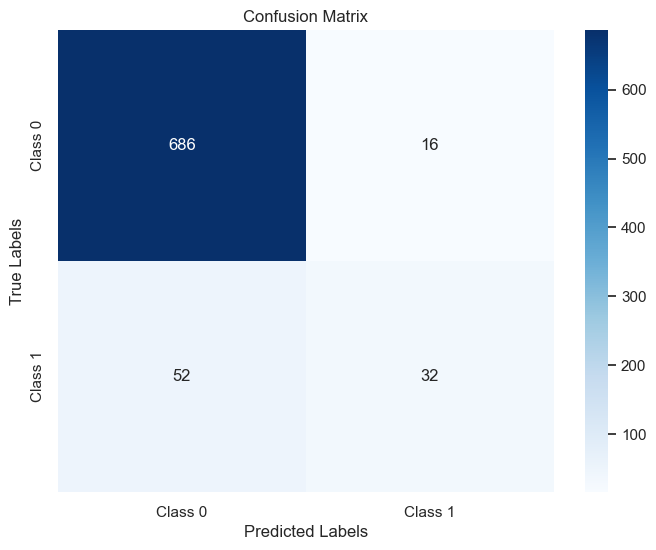

In [425]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Logistic Regression model

In [426]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [427]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [484]:
# Make predictions with the test data
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Calculate the accuracy score
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print('Logistic Regression Accuracy Score:', logreg_accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy Score: 0.910941475826972

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       702
           1       0.67      0.38      0.48        84

    accuracy                           0.91       786
   macro avg       0.80      0.68      0.72       786
weighted avg       0.90      0.91      0.90       786



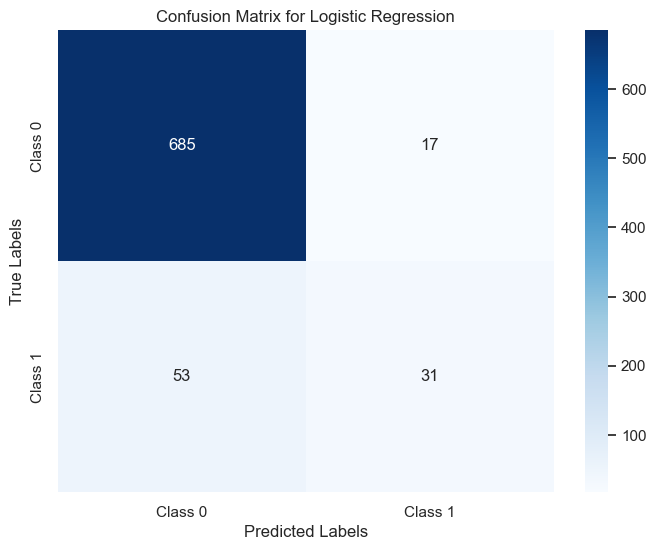

In [482]:
# Generate confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [429]:
# Create the SVM model
svm_model = SVC()

# Train the model with the training data
svm_model.fit(X_train, y_train)

SVC()

In [486]:
# Make predictions with the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy score
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy Score:', svm_accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy Score: 0.8982188295165394

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       702
           1       0.67      0.38      0.48        84

    accuracy                           0.91       786
   macro avg       0.80      0.68      0.72       786
weighted avg       0.90      0.91      0.90       786



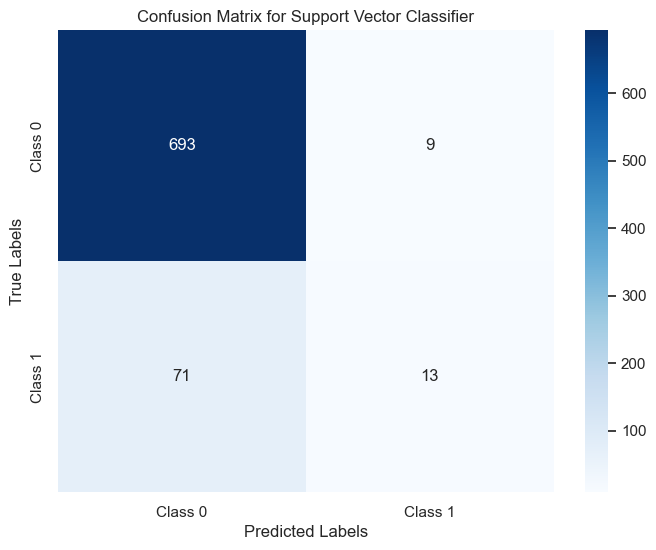

In [490]:
# Generate confusion matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Support Vector Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Decision Tree

In [493]:
# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)



In [495]:
# Train the model with the training data
decision_tree_model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [498]:
# Make predictions with the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate the accuracy score
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print('Decision Tree Accuracy Score:', tree_accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy Score: 0.9096692111959288

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       702
           1       0.67      0.38      0.48        84

    accuracy                           0.91       786
   macro avg       0.80      0.68      0.72       786
weighted avg       0.90      0.91      0.90       786



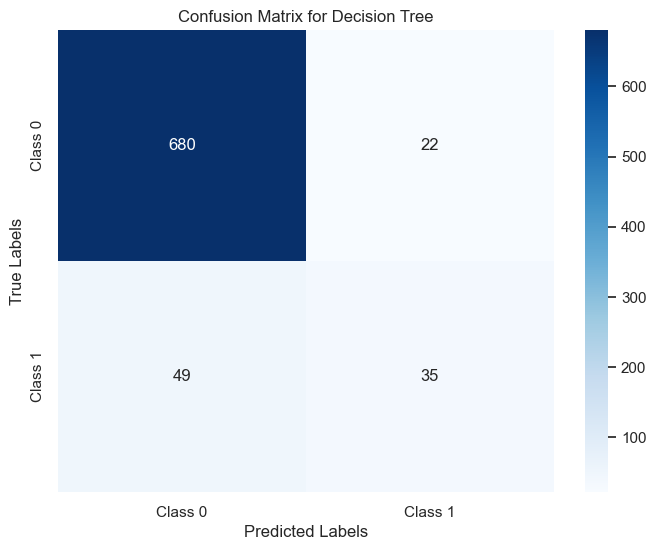

In [500]:
# Generate confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [434]:
# Add the model names and accuracy scores to a list
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [random_forest_accuracy, logreg_accuracy, svm_accuracy, tree_accuracy]

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Display the accuracy scores
print(accuracy_df)

                 Model  Accuracy
0        Random Forest  0.913486
1  Logistic Regression  0.910941
2                  SVM  0.898219
3        Decision Tree  0.909669


### Accuracy Scores Visualization

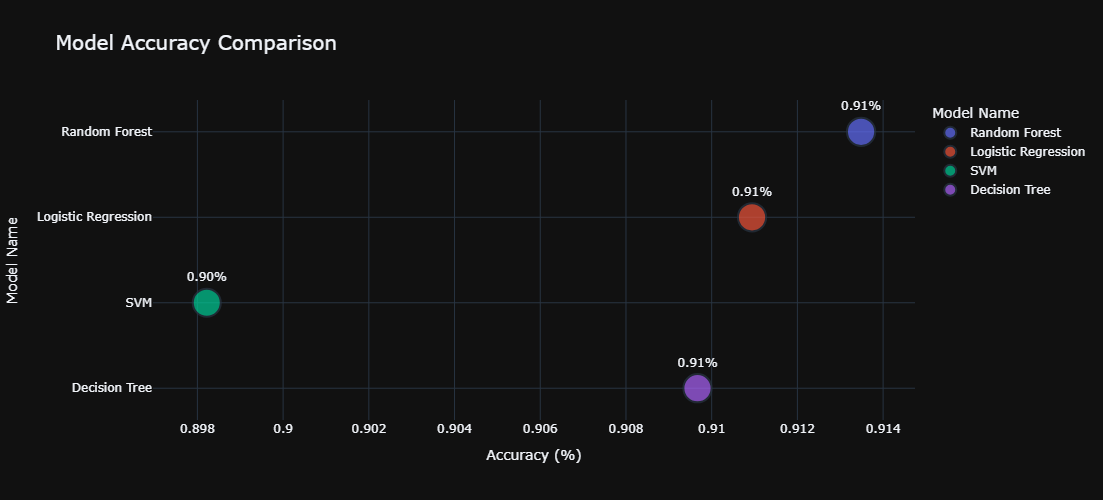

In [435]:
import plotly.express as px

# Create a scatter plot for model accuracies
fig = px.scatter(
    accuracy_df,
    x='Accuracy',  # X-axis: Accuracy
    y='Model',  # Y-axis: Model names
    size='Accuracy',  # Size of the marker proportional to accuracy
    color='Model',  # Color by model for differentiation
    text='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy (%)', 'Model': 'Model Name'}
)

# Update layout for better readability
fig.update_traces(
    marker=dict(line_width=2),  # Thicker marker outlines
    texttemplate='%{text:.2f}%',  # Show accuracy with two decimal points
    textposition='top center'  # Center text above markers
)

# Customize layout for visual clarity
fig.update_layout(
    title_font_size=20,
    xaxis_title='Accuracy (%)',
    yaxis_title='Model Name',
    template='plotly_dark',  # Optional: Use a dark theme
    height=500  # Adjust chart height for better viewing
)

# Show the plot
fig.show()
